## Linear Regression in Machine Learning

In [3]:
import pandas as mypd
import matplotlib.pyplot as myplot
import seaborn as mysb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score


In [5]:
mydata=mypd.read_csv("C:/Users/user/OneDrive/Desktop/Datasets/Mult_Reg_Yield.csv")
mydata

,Time,Temperature,Yield
0,130,190,35.0
1,174,176,81.7
2,134,205,42.5
3,191,210,98.3
4,165,230,52.7
5,194,192,82.0
6,143,220,34.5
7,186,235,95.4
8,139,240,56.7
9,188,230,84.4


In [6]:
#To check missing values
mydata.describe()

,Time,Temperature,Yield
count,16.000000,16.000000,16.000000
mean,163.937500,213.062500,66.981250
std,23.450569,17.650189,23.705336
min,130.000000,176.000000,34.500000
25%,142.000000,203.750000,44.100000
50%,169.500000,214.000000,69.200000
75%,186.500000,226.250000,86.150000
max,194.000000,240.000000,98.300000


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         16 non-null     int64  
 1   Temperature  16 non-null     int64  
 2   Yield        16 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 516.0 bytes


In [8]:
#Separating x's and y's
x = mydata.iloc[:, 0:2]
x

,Time,Temperature
0,130,190
1,174,176
2,134,205
3,191,210
4,165,230
5,194,192
6,143,220
7,186,235
8,139,240
9,188,230


In [9]:
#Separating x's and y's
y = mydata.Yield
y

0     35.0
1     81.7
2     42.5
3     98.3
4     52.7
5     82.0
6     34.5
7     95.4
8     56.7
9     84.4
10    94.3
11    44.3
12    83.3
13    91.4
14    43.5
15    51.7
Name: Yield, dtype: float64

C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


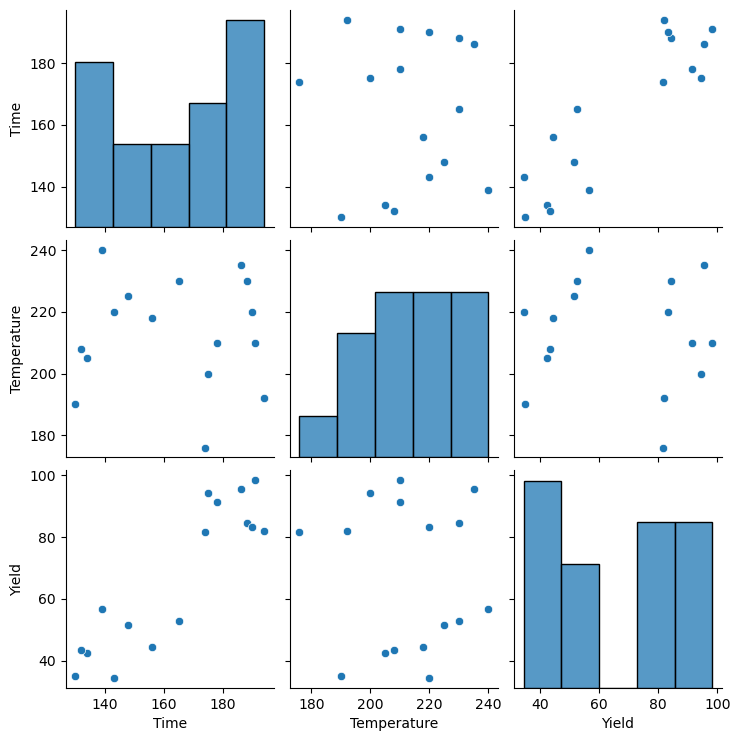

In [10]:
#Correlation Analysis
# Scatter plot
mysb.pairplot(mydata)
myplot.show()

In [11]:
#Regression Modeling
# fitting the model
mymodel = LinearRegression()
mymodel

LinearRegression()

In [12]:
mymodel = mymodel.fit(x,y)
mymodel

LinearRegression()

In [13]:
mymodel.coef_

array([ 0.90608862, -0.06418911])

In [14]:
mymodel.intercept_

-67.88435970368447

In [15]:
# Model accuracy-R Square value
rsq = mymodel.score(x,y)
rsq

0.806376388199527

In [16]:
round(rsq*100,2)

80.64

In [17]:
pred = mymodel.predict(x)
pred

array([37.71122898, 78.47777573, 40.37274675, 91.69885237, 66.85676605,
       95.57252226, 47.5647076 , 85.56368144, 42.65657086, 87.69680424,
       77.84332562, 59.47223785, 90.15087261, 79.91970034, 38.36800217,
       51.77420512])

In [18]:
mse = mean_squared_error(y, pred)
mse

102.00508614219632

In [19]:
import math as mymath
rmse = mymath.sqrt(mse)
rmse

10.099756736783135

In [20]:
# Residual Analysis
res = y-pred
res

0     -2.711229
1      3.222224
2      2.127253
3      6.601148
4    -14.156766
5    -13.572522
6    -13.064708
7      9.836319
8     14.043429
9     -3.296804
10    16.456674
11   -15.172238
12    -6.850873
13    11.480300
14     5.131998
15    -0.074205
Name: Yield, dtype: float64

In [21]:
pred=mypd.DataFrame(pred,columns=['Predicted'])
pred

,Predicted
0,37.711229
1,78.477776
2,40.372747
3,91.698852
4,66.856766
5,95.572522
6,47.564708
7,85.563681
8,42.656571
9,87.696804


In [24]:
myresult=mydata.join(pred)
myresult

,Time,Temperature,Yield,Predicted
0,130,190,35.0,37.711229
1,174,176,81.7,78.477776
2,134,205,42.5,40.372747
3,191,210,98.3,91.698852
4,165,230,52.7,66.856766
5,194,192,82.0,95.572522
6,143,220,34.5,47.564708
7,186,235,95.4,85.563681
8,139,240,56.7,42.656571
9,188,230,84.4,87.696804


In [22]:
from scipy import stats

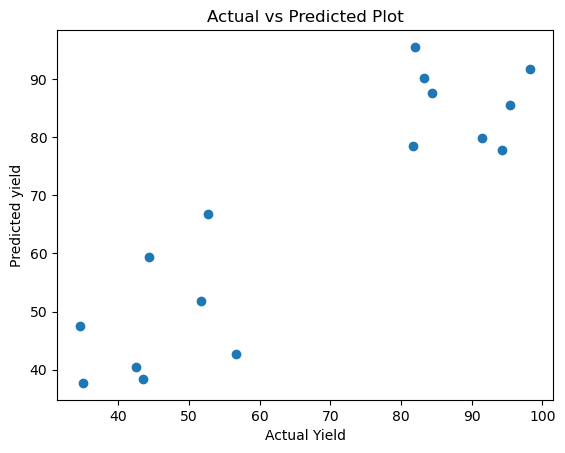

In [23]:
#Residual Analysis – Actual Vs Predicted Plot
myplot.scatter(y, pred)
myplot.title("Actual vs Predicted Plot")
myplot.xlabel("Actual Yield")
myplot.ylabel("Predicted yield")
myplot.show()

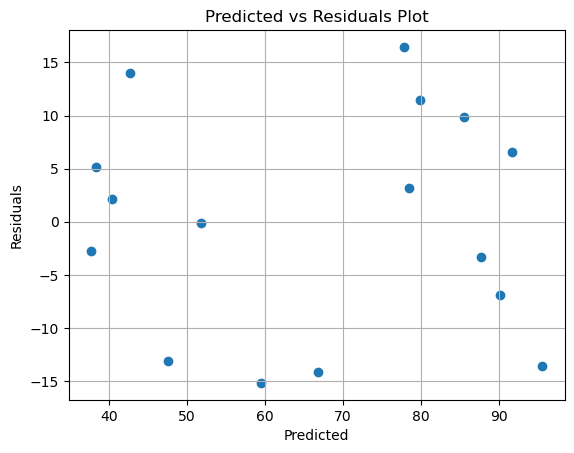

In [24]:
#Residual Analysis – Predicted Vs Residuals Plot
myplot.scatter(pred, res)
myplot.title("Predicted vs Residuals Plot")
myplot.xlabel("Predicted")
myplot.ylabel("Residuals")
myplot.grid()
myplot.show()

In [28]:
#Residual Analysis: Normality test
norm_test = stats.normaltest(res)


In [30]:
w = norm_test[0]
w

1.983548761886919

In [31]:
p_value = norm_test[1]
p_value

0.37091795701782565

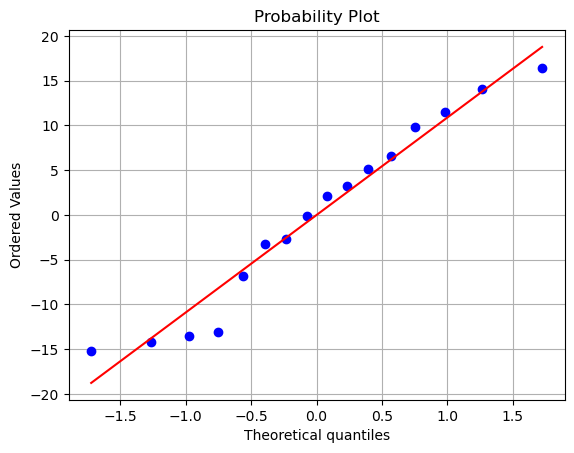

In [26]:
stats.probplot(res, plot= myplot)
myplot.grid()
myplot.show()

In [27]:
stats.normaltest(res)
#gives p value>0.05. So residuals are normally distributed

NormaltestResult(statistic=1.983548761886919, pvalue=0.37091795701782565)

In [26]:
# Cross Validation-Model Generalizability check(compare mse and rmse for original one and those obtained after cross validation)
myscore = cross_val_score(mymodel,x, y, scoring='neg_mean_squared_error', cv = 4)
myscore


array([ -32.01088274, -210.53848586, -187.22995242,  -60.51099775])

In [27]:
cv_mse=-1*myscore.mean()
cv_mse

122.57257969078277

In [21]:
rmse = mymath.sqrt(cv_mse)
rmse

11.071250141279569

In [22]:
#Cross validation residual sum of squares
cv_rss=cv_mse*16
cv_rss

1961.1612750525258

In [23]:
#Total Sum of Squares
total_ss=y.var()*(16-1)
total_ss

8429.144375000002

In [24]:
cv_rsq=1-(cv_rss/total_ss)
cv_rsq

0.7673356644751353